In [4]:
#Need to visalize data in reasonable way
#'pivotable' by sex, age, ethnicity, indutry/sector
# definitely use data set from chat on prepr instead of current method.

import pandas as pd
import matplotlib.pyplot as plt
# Import python library for dealing with statcan tables
from stats_can import StatsCan as sc

In [6]:
#Job Skills file, not sure how this will come into play yet but it is asked for.
titles = pd.read_csv('job_skills.csv')

#Statcan Table ID numbers used to create dataframes
EI_ID = "14-10-0355-02"
EP_ID = "14-10-0355-02" 
LP_ID = "14-10-0287-03"
EI = sc().table_to_df(EI_ID)
EP = sc().table_to_df(EP_ID)
LP = sc().table_to_df(LP_ID)

#Labour data shared from discussion section
labour_m = pd.read_csv('Proper labour data months.csv')
labour_y = pd.read_csv('Proper labour data years.csv')

# List of column names I was using while trying to figure out these weird tables. Delete if not needed
# column_Names = ("January 2019","February 2019","Standard error{1}","January to February 2019","February 2018 to February 2019","January to February 2019","February 2018 to February 2019")
# # emp_Ind = pd.read_csv('CAN_Employment_byIndustry.csv',usecols=column_Names)
# emp_Prov = pd.read_csv('CAN_Employment_byProvinceandIndustry.csv')
# lab_Prov = pd.read_csv('CAN_Labour_byProvince.csv')
EI = EI[EI['REF_DATE']>'2015-02-01T00:00:00.000000000']
EP = EP[EP['REF_DATE']>'2015-02-01T00:00:00.000000000']
LP = LP[LP['REF_DATE']>'2015-02-01T00:00:00.000000000']


/home/justingbabin/miniconda3/envs/conda_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:


# There are many NaN values - we need to cleanse the data by removing rows where the VALUE is NaN
labour_y = labour_y.dropna(axis = 0, how = 'any', subset = ['VALUE'])
labour_y.head()


,REF_DATE,GEO,DGUID,Labour force characteristics,North American Industry Classification System (NAICS),Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
6,2014,Newfoundland and Labrador,2016A000210,Employment,"Agriculture [111-112, 1100, 1151-1152]",Males,25 to 54 years,Persons,249,thousands,3,v19669885,2.2.3.2.3,0.5,NaN,NaN,NaN,1
7,2015,Newfoundland and Labrador,2016A000210,Employment,"Agriculture [111-112, 1100, 1151-1152]",Males,25 to 54 years,Persons,249,thousands,3,v19669885,2.2.3.2.3,0.7,NaN,NaN,NaN,1
8,2016,Newfoundland and Labrador,2016A000210,Employment,"Agriculture [111-112, 1100, 1151-1152]",Males,25 to 54 years,Persons,249,thousands,3,v19669885,2.2.3.2.3,0.8,NaN,NaN,NaN,1
9,2017,Newfoundland and Labrador,2016A000210,Employment,"Agriculture [111-112, 1100, 1151-1152]",Males,25 to 54 years,Persons,249,thousands,3,v19669885,2.2.3.2.3,0.7,NaN,NaN,NaN,1
10,2018,Newfoundland and Labrador,2016A000210,Employment,"Agriculture [111-112, 1100, 1151-1152]",Males,25 to 54 years,Persons,249,thousands,3,v19669885,2.2.3.2.3,0.5,NaN,NaN,NaN,1


In [26]:
#Creates the pivot table and then plots it
pivot = labour_y.pivot_table(values = 'VALUE', index = ["REF_DATE","Sex","Age group"], columns = "GEO" )
pivot.head()

GEO                                   Alberta  British Columbia  Manitoba  \
REF_DATE Sex     Age group                                                  
2014     Females 15 to 24 years      8.352632          9.561111  2.615000   
                 25 to 54 years     28.330769         28.075000  8.754167   
                 55 years and over   9.330000         11.368421  3.005263   
         Males   15 to 24 years      9.228571          7.808333  2.520833   
                 25 to 54 years     36.823077         30.772414  9.773077   

GEO                                 New Brunswick  Newfoundland and Labrador  \
REF_DATE Sex     Age group                                                     
2014     Females 15 to 24 years          2.218182                   2.071429   
                 25 to 54 years          4.696296                   3.562500   
                 55 years and over       2.022222                   1.413333   
         Males   15 to 24 years          1.370000                   1.181818   
                 25 to 54 years          4.663333                   3.446429   

GEO                                 Nova Scotia    Ontario  \
REF_DATE Sex     Age group                                   
2014     Females 15 to 24 years        2.584615  20.314286   
                 25 to 54 years        6.320000  69.419444   
                 55 years and over     2.511111  28.875000   
         Males   15 to 24 years        1.636364  18.659375   
                 25 to 54 years        5.160606  76.350000   

GEO                                 Prince Edward Island     Quebec  \
REF_DATE Sex     Age group                                            
2014     Females 15 to 24 years                 0.611111  15.127273   
                 25 to 54 years                 1.168182  49.566667   
                 55 years and over              0.488235  16.717391   
         Males   15 to 24 years                 0.373333  13.081481   
                 25 to 54 years                 1.060000  48.189189   

GEO                                 Saskatchewan  
REF_DATE Sex     Age group                        
2014     Females 15 to 24 years         2.452941  
                 25 to 54 years         7.320833  
                 55 years and over      3.041176  
         Males   15 to 24 years         2.526316  
                 25 to 54 years         9.763636

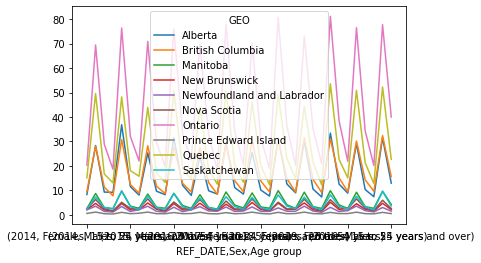

In [25]:
pivot.plot()
plt.show()